In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt

The dataset is used to estimate the age of the crab based on the physical attributes.
* **Sex** - Gender of the Crab - Male, Female and Indeterminate.
* **Length** - Length of the Crab (in Feet; 1 foot = 30.48 cms)
* **Diameter** - Diameter of the Crab (in Feet; 1 foot = 30.48 cms)
* **Height** - Height of the Crab (in Feet; 1 foot = 30.48 cms)
* **Weight** - Weight of the Crab (in ounces; 1 Pound = 16 ounces)
* **Shucked Weight** - Weight without the shell (in ounces; 1 Pound = 16 ounces)
* **Viscera Weight** - weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces)
* **Shell Weight** - Weight of the Shell (in ounces; 1 Pound = 16 ounces)
* **Age** - Age of the Crab (in months)

In [2]:
krabs = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv', index_col='id')
krabs.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
krabs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ MB


In [4]:
krabs.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [5]:
krabs_test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv', index_col='id')
krabs_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49368 entries, 74051 to 123418
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.4+ MB


# Data exploration

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>,
        <Axes: title={'center': 'Viscera Weight'}>],
       [<Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

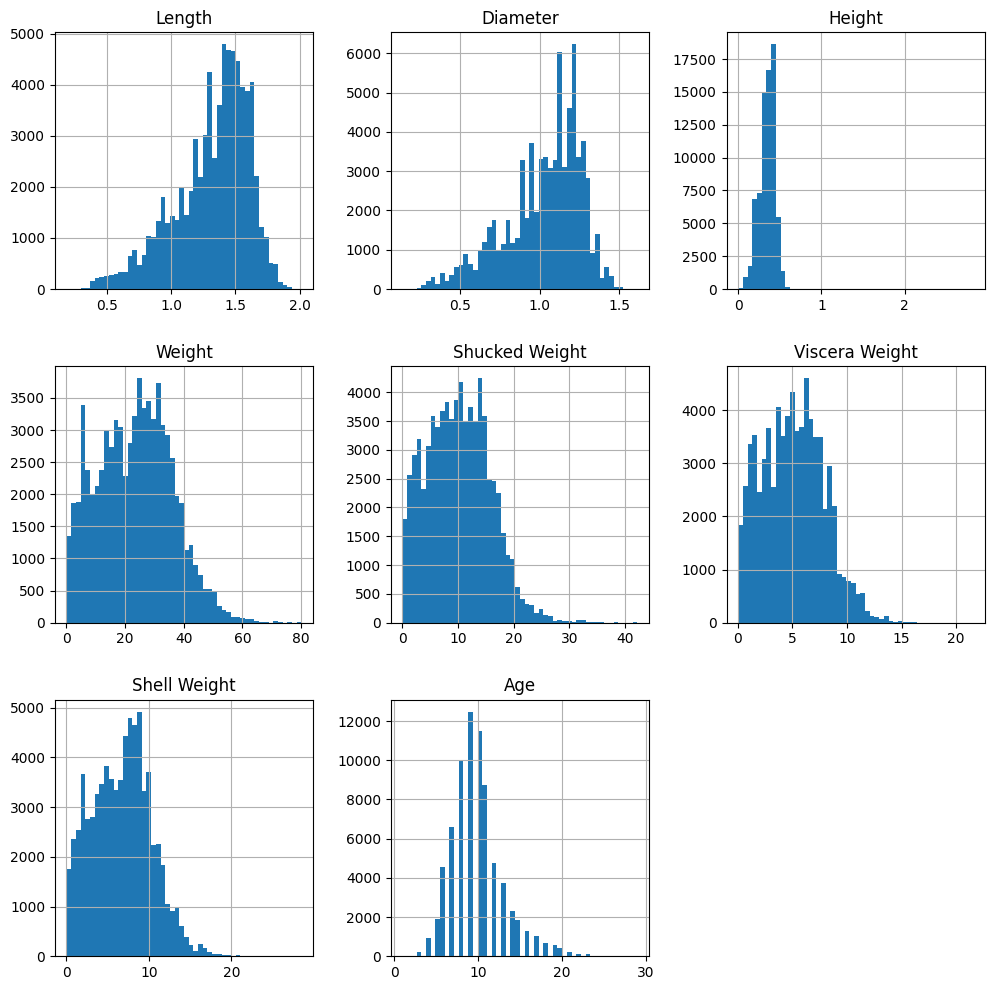

In [6]:
krabs.hist(bins=50, figsize=[12, 12])

In [7]:
corr_matrix = krabs[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']].corr()
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#     square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr_matrix['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.663473
Height            0.638067
Diameter          0.621256
Length            0.612843
Weight            0.601195
Viscera Weight    0.576808
Shucked Weight    0.503320
Name: Age, dtype: float64

# Data processing

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_attributes = ['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight']

cat_attributes = ['Sex']

num_pipe = Pipeline(
    [("simpleimputer", SimpleImputer()),
    ('standardscaler', StandardScaler())]
)

cat_pipe = Pipeline(
    [("simpleimputer", SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown="ignore"))]
)

preprocessing = ColumnTransformer(
    [("num_pipeline", num_pipe, num_attributes),
    ("cat_pipeline", cat_pipe, cat_attributes)]
)

In [9]:
cooked_krabs = preprocessing.fit_transform(krabs)
cooked_krabs_df = pd.DataFrame(cooked_krabs, columns=preprocessing.get_feature_names_out(), index=krabs.index)

In [10]:
cooked_krabs_df

,num_pipeline__Length,num_pipeline__Diameter,num_pipeline__Height,num_pipeline__Weight,num_pipeline__Shucked Weight,num_pipeline__Viscera Weight,num_pipeline__Shell Weight,cat_pipeline__Sex_F,cat_pipeline__Sex_I,cat_pipeline__Sex_M
id,,,,,,,,,,
0,0.721238,0.633982,0.292400,0.441804,0.467188,0.569186,0.453376,0.0,1.0,0.0
1,-0.755712,-0.840356,-0.794163,-1.025198,-0.993688,-0.978880,-0.926788,0.0,1.0,0.0
2,0.243401,0.370707,0.292400,0.110076,0.219924,0.178363,-0.017224,0.0,0.0,1.0
3,1.329394,1.634426,1.650603,2.156483,1.824616,2.124622,2.308095,1.0,0.0,0.0
4,-0.234435,-0.050532,-0.115061,-0.007598,0.333464,-0.197233,-0.214955,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
74046,1.199075,1.002567,0.971501,2.156483,1.882648,1.899000,1.564626,1.0,0.0,0.0
74047,-0.842591,-0.682391,-0.794163,-1.022957,-1.029011,-0.989031,-0.887242,0.0,1.0,0.0
74048,0.590919,0.739292,0.699861,0.482150,0.391495,0.888951,0.378238,1.0,0.0,0.0


# Model training

In [11]:
x_train = cooked_krabs_df
y_train = krabs[['Age']]

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(x_train)
print(mean_absolute_error(y_train, predictions))

1.4822317628935555


In [14]:
x_test = preprocessing.transform(krabs_test)
test_pred = model.predict(x_test)
submission_df = pd.DataFrame({"id":krabs_test.index, "Age":np.squeeze(test_pred)})

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
submission_df.to_csv('submission.csv', index=False)